In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('KAG_conversion_data.csv')
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [102]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [103]:
df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [104]:
df.corr()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
ad_id,1.000000,0.929892,0.972002,0.456483,0.462308,0.431981,0.433053,0.346539,0.271331
xyz_campaign_id,0.929892,1.000000,0.872392,0.272282,0.495273,0.469729,0.476689,0.346684,0.284968
fb_campaign_id,0.972002,0.872392,1.000000,0.595753,0.439439,0.406978,0.403532,0.344170,0.257658
interest,0.456483,0.272282,0.595753,1.000000,0.101973,0.088706,0.070226,0.120270,0.058353
Impressions,0.462308,0.495273,0.439439,0.101973,1.000000,0.948514,0.970386,0.812838,0.684249
Clicks,0.431981,0.469729,0.406978,0.088706,0.948514,1.000000,0.992906,0.694632,0.559526
Spent,0.433053,0.476689,0.403532,0.070226,0.970386,0.992906,1.000000,0.725379,0.593178
Total_Conversion,0.346539,0.346684,0.344170,0.120270,0.812838,0.694632,0.725379,1.000000,0.864034
Approved_Conversion,0.271331,0.284968,0.257658,0.058353,0.684249,0.559526,0.593178,0.864034,1.000000


Separating 'Categorical' and 'Numerical' columns

Categorical

In [8]:
categorical_features=[ x for x in df.columns if df[x].dtype == 'O']
categorical_featurescategorical_features=[ x for x in df.columns if df[x].dtype == 'O']
categorical_features

['age', 'gender']

There are only 2 categorical columns namely, age and gender.

In [9]:
for x in categorical_features:
    abc = df[x].value_counts()
    print(abc)

30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64
M    592
F    551
Name: gender, dtype: int64


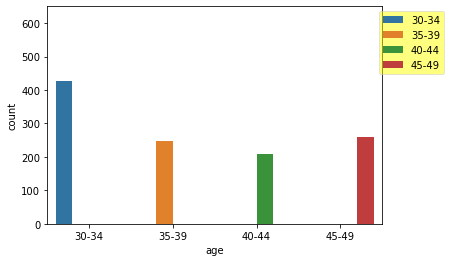

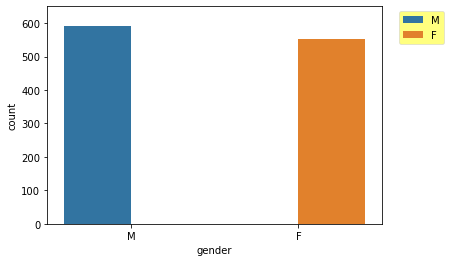

In [10]:
for i in categorical_features:
    sns.countplot(df[i], hue= df[i])
    plt.ylim(0,650)
    plt.legend(loc='upper right', facecolor='yellow', framealpha=0.5, bbox_to_anchor=(1.2,1))
    plt.show()

In [11]:
numerical_features = [x for x in df.columns if x not in categorical_features]
numerical_features

['ad_id',
 'xyz_campaign_id',
 'fb_campaign_id',
 'interest',
 'Impressions',
 'Clicks',
 'Spent',
 'Total_Conversion',
 'Approved_Conversion']

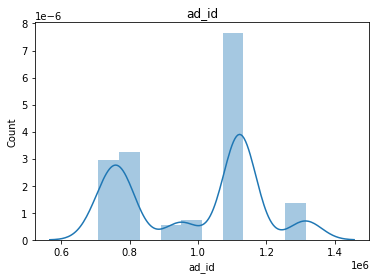

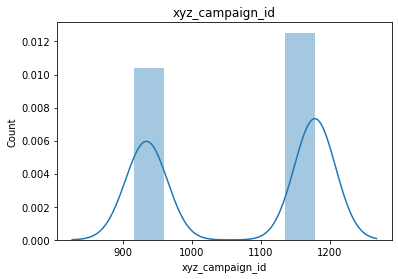

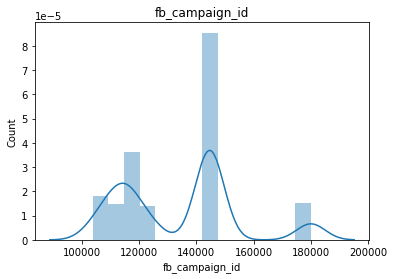

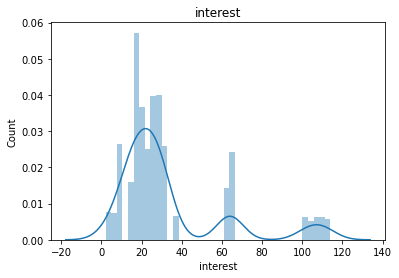

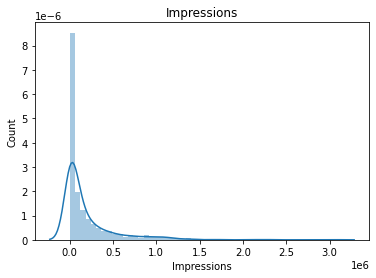

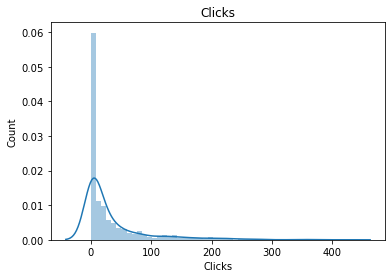

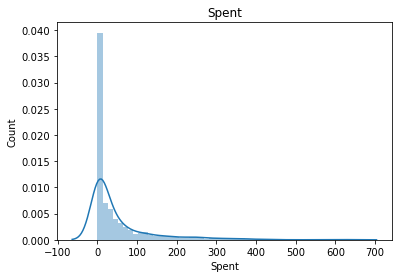

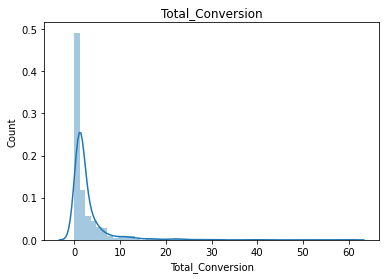

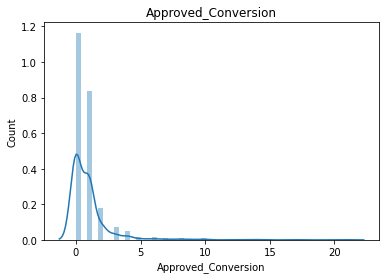

In [12]:
for i in numerical_features:
    sns.distplot(df[i])
    plt.title(i)
    plt.ylabel('Count')
    plt.show()

Dummy encode any categorical or object values in the data and save the resulting data
frame to variable X.

In [13]:
X = df

In [14]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

for x in categorical_features:
    df[x]= le.fit_transform(df[x])
    print(x, le.classes_)
   

age ['30-34' '35-39' '40-44' '45-49']
gender ['F' 'M']


In [15]:
X

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,0,1,15,7350,1,1.430000,2,1
1,708749,916,103917,0,1,16,17861,2,1.820000,2,0
2,708771,916,103920,0,1,20,693,0,0.000000,1,0
3,708815,916,103928,0,1,28,4259,1,1.250000,1,0
4,708818,916,103928,0,1,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,3,0,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,3,0,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,3,0,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,3,0,113,790253,135,198.710001,8,2


Using a heat map to show the correlation in the data.

a. Drop the first 4 columns in the data frame X.

b. Basing your answer on what can be seen in the heat map, why did we drop these columns?

<AxesSubplot:>

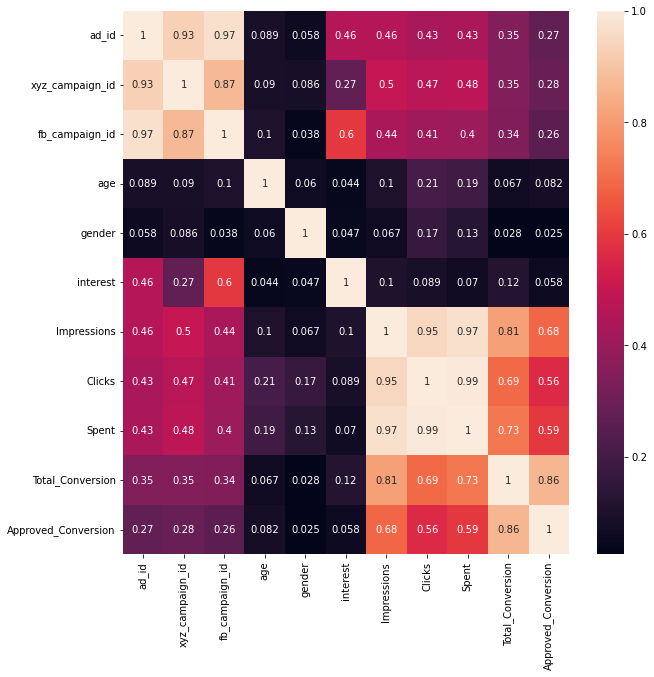

In [16]:
# Finding the Correlation
fig= plt.figure(figsize=(10,10))

sns.heatmap(X.corr().abs() , annot= True)

In [17]:
# Keeping only the related columns
x=X.drop(['ad_id','xyz_campaign_id', 'fb_campaign_id', 'age'],axis =1)
x.head()

,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,1,15,7350,1,1.43,2,1
1,1,16,17861,2,1.82,2,0
2,1,20,693,0,0.00,1,0
3,1,28,4259,1,1.25,1,0
4,1,28,4133,1,1.29,1,1


Using the elbow method:

a. Determine the best number of clusters for the data in the range of 2 to 20.

b. Also include the graphical plot for the elbow curve

In [18]:

# Bringing down all the values to same scale(between 0 to 1)

from sklearn.preprocessing import StandardScaler

scale= StandardScaler()
x_scaled = pd.DataFrame(scale.fit_transform(x), columns = x.columns)

In [19]:
data= x_scaled.copy()

data.head()

,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,0.96475,-0.659472,-0.573793,-0.569573,-0.574772,-0.190922,0.032236
1,0.96475,-0.622353,-0.540171,-0.551988,-0.570282,-0.190922,-0.543486
2,0.96475,-0.473877,-0.595087,-0.587157,-0.591233,-0.414055,-0.543486
3,0.96475,-0.176924,-0.583680,-0.569573,-0.576844,-0.414055,-0.543486
4,0.96475,-0.176924,-0.584083,-0.569573,-0.576383,-0.414055,0.032236


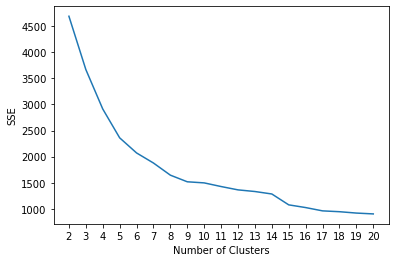

In [20]:
#initialize kmeans parameters
kmeans_kwargs = {"init": "random","n_init": 20,"random_state": 2,}

#create list to hold SSE values for each k
sse = []
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x_scaled)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(2, 21), sse)
plt.xticks(range(2, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

alternatively,

In [29]:
xfeatures=df[['interest', 'Impressions', 'Clicks', 'Spent']]


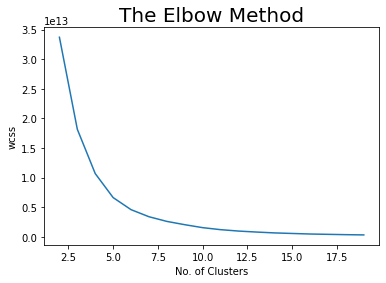

In [30]:
wcss = []
for i in range(2, 20):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 20, random_state = 0)
    km.fit(xfeatures)
    wcss.append(km.inertia_)
    
plt.plot(range(2, 20), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()


In this plot it appears that there is an elbow or “bend” at k = 5 clusters in both graphs above.

Thus, we will use 5 clusters when fitting our k-means clustering model in the next step.

In [ ]:
# Clustering using K-Means 

model = KMeans(n_clusters=5)
model.fit(x_scaled)
x['cluster'] = model.predict(x_scaled)


sns.pairplot(x,hue='cluster')
plt.show()

In [ ]:
# Based on the result above in 4b use the value at your elbow point to cluster the values in the data frame X.

kmeans = KMeans(init="random", n_clusters=5, n_init=20, random_state=1)

#fit k-means algorithm to data
kmeans.fit(x_scaled)

#view cluster assignments for each observation
kmeans.labels_


In [ ]:
X['cluster']=kmeans.labels_

X

Based on the result above in 4b use the value at your elbow point to cluster the values in
the data frame X

In [ ]:
model = KMeans(n_clusters= 5, max_iter=20)
model.fit(data.values)

In [ ]:
y_means = KMeans(n_clusters=5)

In [ ]:
xfeatures=df[['interest', 'Impressions', 'Clicks', 'Spent']]


In [ ]:
advert_type = y_means.fit_predict(xfeatures)

In [ ]:
y_means.labels_

In [ ]:
advert_type

In [ ]:
advert_type is y_means.labels_

In [ ]:
y_means.cluster_centers_

In [ ]:
df['advert_type']
df

Using any form of distribution plot of your choice and the original data frame, plot 2
graphs that can be used to answer the following:
    
a. Which advert type lead to the highest and consistent amount of sales by
customers of all the age brackets?

b. Does the company xyz have gender bias in terms of their ad spending? Are their
products gender neutral?

In [ ]:
df['ad_id'].nunique()

In [ ]:
df['xyz_campaign_id'].nunique()

In [ ]:
df['fb_campaign_id'].nunique()

The column, 'ad_id' has all unique ids while 'xyz_campaign_id' and 'fb_compaign_id' have 3, 691 unique ids.

In [ ]:
xyz_imp = df.groupby('xyz_campaign_id', as_index = False).agg({'Impressions': 'sum', 'Clicks': 'sum', 'Spent': 'sum'})
xyz_imp

In [ ]:
fb_imp = df.groupby('fb_campaign_id', as_index = False).agg({'Impressions': 'sum', 'Clicks': 'sum', 'Spent': 'sum'})
fb_imp

In [ ]:
melt = pd.melt(xyz_imp, id_vars = ['xyz_campaign_id'], value_vars = ['Impressions', 'Clicks', 'Spent'], var_name = 'result', value_name = 'total')
melt

In [ ]:
sns.catplot(x = 'xyz_campaign_id', y = 'total', col = 'result', data = melt, kind = 'bar', sharey = False)
plt.show()

In [ ]:
# By Age Group

df['age'].value_counts().plot(kind = 'bar')
plt.show()

In [ ]:
imp_by_age = df.groupby('age')['Impressions'].sum()
imp_by_age.plot(kind = 'bar')
plt.show()

As for the number of impression, age bracket 30 to 34 was the highest.

The impressions for the audience aged 45 to 49 was almost as high.

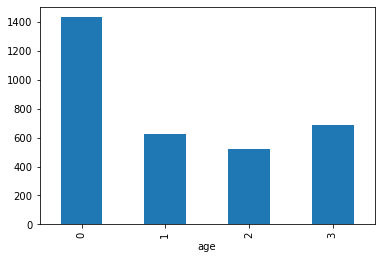

In [22]:
total_by_age = df.groupby('age')['Total_Conversion'].sum()
total_by_age.plot(kind = 'bar')
plt.show()

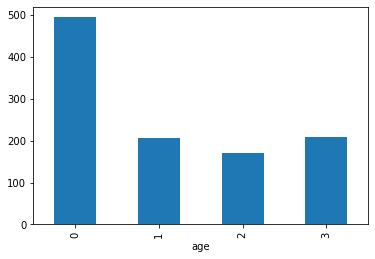

In [23]:
approved_by_age = df.groupby('age')['Approved_Conversion'].sum()
approved_by_age.plot(kind = 'bar')
plt.show()

Does the company xyz have gender bias in terms of their ad spending? Are their products gender neutral?

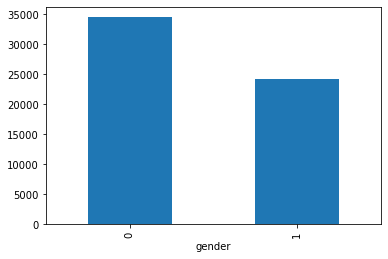

In [24]:
gender_spent = df.groupby('gender')['Spent'].sum()
gender_spent.plot(kind = 'bar')
plt.show()

More spending on ads were slightly more to female audience.

Perform the same analysis using hierarchical clustering and compare the results in terms
of the number of useable clusters.

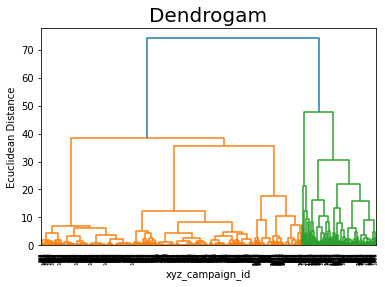

In [27]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x_scaled, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('xyz_campaign_id')
plt.ylabel('Ecuclidean Distance')
plt.show()

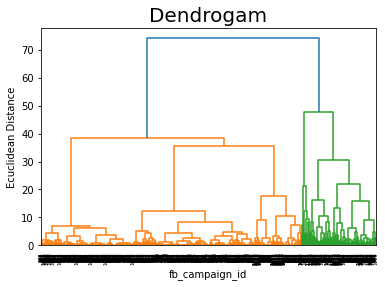

In [31]:
fb_campaign_dendrogram = sch.dendrogram(sch.linkage(x_scaled, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('fb_campaign_id')
plt.ylabel('Ecuclidean Distance')
plt.show()